In [ ]:
import os
os.chdir("..")
os.getcwd()

'd:\\Work\\Github\\mlchatagent'

In [1]:
import os
# Get the current working directory
current_dir = os.getcwd()
# Assuming the root directory is one level up from the current directory
root_dir = os.path.dirname(current_dir)
# Change the working directory to the root directory
os.chdir(root_dir)

In [2]:
import pandas as pd
df=pd.read_csv('data/customer_profile.txt', sep=',', encoding='utf-8')

In [19]:
df.groupby(['tenure_months']).agg(
    count=('customer_id', 'count'),
    churn_rate=('is_churned', 'mean'),
    avg_age=('age', 'mean'),
    avg_income=('annual_income', 'mean'),
    avg_balance=('home_value', 'mean')
).reset_index()

,tenure_months,count,churn_rate,avg_age,avg_income,avg_balance
0,1,840,0.197619,52.096429,153158.827381,461802.889984
1,2,839,0.184744,53.287247,137251.998808,410248.829187
2,3,838,0.187351,52.381862,145315.130072,436904.139415
3,4,819,0.178266,52.147741,149186.555556,444379.233871
4,5,871,0.180253,51.599311,148036.442021,427422.818182
...,...,...,...,...,...,...
115,116,898,0.169265,51.370824,142942.067929,424251.689759
116,117,819,0.161172,52.947497,137676.256410,419346.097643
117,118,886,0.187359,51.515801,140113.252822,420346.647692
118,119,835,0.176048,51.834731,161343.276647,472403.192869


In [21]:
df.head()

,customer_id,account_number,customer_segment,customer_type,service_start_date,service_end_date,tenure_months,is_churned,customer_status,churn_destination,...,regulated_utility_consideration,payment_method,late_payment_rate,avg_monthly_bill,bill_payment_consistency,complaint_history,service_interruptions_12m,bill_shock_events,business_type,business_size
0,CUST000001,ACC00000001,small_business,commercial,2023-08-15,NaN,22,0,active,NaN,...,low,auto_pay,0.11,243,84,0,3,0,office,medium
1,CUST000002,ACC00000002,small_business,commercial,2016-12-19,NaN,103,0,active,NaN,...,low,mail,0.22,117,70,0,0,0,agriculture,medium
2,CUST000003,ACC00000003,affluent_professionals,residential,2024-09-08,NaN,9,0,active,NaN,...,low,online,0.04,316,98,3,1,2,NaN,NaN
3,CUST000004,ACC00000004,small_business,commercial,2015-08-27,NaN,119,0,active,NaN,...,low,mail,0.19,283,75,0,3,1,office,small
4,CUST000005,ACC00000005,affluent_professionals,residential,2022-09-19,NaN,33,0,active,NaN,...,low,online,0.30,214,89,2,3,1,NaN,NaN


In [4]:

import os
import sys

import pandas as pd

from ml_process.xgb_process import shap_summary,xgb_model
import yaml
import xgboost as xgb
import json
import numpy as np
import pickle
from ml_process.create_dice_models import DiceModelCreator
import shap



##Load config file named conf.yml
with open('conf_telchurn.yml') as file:
    conf = yaml.load(file, Loader=yaml.FullLoader)

#Load processed data
df=pd.read_csv(conf['data']['processed_data_path'])
cat_cols=conf['model']['features']['cat_features']
num_cols=conf['model']['features']['num_features']
target=conf['model']['features']['target']
id_features=conf['model']['features']['id_features']


# Initialize and use the model
model_instance = xgb_model.XGBoostModel(df=df, cat_features=cat_cols, num_features=num_cols, target=target,id_features=id_features, mode='dev')
model,dtrain,X_train,dtest,X_test=model_instance.train_model()
X_train=X_train.reset_index(drop=True)
X_test=X_test.reset_index(drop=True)

# print("Saving model")
# # Save the model to a pickle file
# with open(conf['model']['model_location'], 'wb') as f:
#     pickle.dump(model, f)


# print("Save train and test data with predictions")
# X_train.to_csv(conf['model']['predicted_train_data'], index=False)
# X_test.to_csv(conf['model']['predicted_test_data'], index=False)


analyzer=shap_summary.ShapAnalyzer(model=model,
                                X_train=X_train,
                                dtrain=dtrain,
                                cat_features=cat_cols,
                                num_features=num_cols)

##Save the local SHAP explanation for X_test and X_train
print("Getting Local SHAP explanation saved")
explainer=analyzer.get_explainer()
base_value = explainer.expected_value

[0]	train-auc:0.64386	test-auc:0.62473
[1]	train-auc:0.65213	test-auc:0.63917
[2]	train-auc:0.65909	test-auc:0.64175
[3]	train-auc:0.66217	test-auc:0.64157
[4]	train-auc:0.66764	test-auc:0.64497
[5]	train-auc:0.66851	test-auc:0.64423
[6]	train-auc:0.67196	test-auc:0.64746
[7]	train-auc:0.67316	test-auc:0.64868
[8]	train-auc:0.67596	test-auc:0.65256
[9]	train-auc:0.67742	test-auc:0.65299
[10]	train-auc:0.68005	test-auc:0.65381
[11]	train-auc:0.68368	test-auc:0.65528
[12]	train-auc:0.68448	test-auc:0.65597
[13]	train-auc:0.68670	test-auc:0.65591
[14]	train-auc:0.68838	test-auc:0.65652
[15]	train-auc:0.68981	test-auc:0.65813
[16]	train-auc:0.69171	test-auc:0.65940
[17]	train-auc:0.69357	test-auc:0.66094
[18]	train-auc:0.69511	test-auc:0.66197
[19]	train-auc:0.69684	test-auc:0.66319
[20]	train-auc:0.69818	test-auc:0.66405
[21]	train-auc:0.69995	test-auc:0.66396
[22]	train-auc:0.70190	test-auc:0.66507
[23]	train-auc:0.70397	test-auc:0.66579
[24]	train-auc:0.70454	test-auc:0.66592
[25]	train

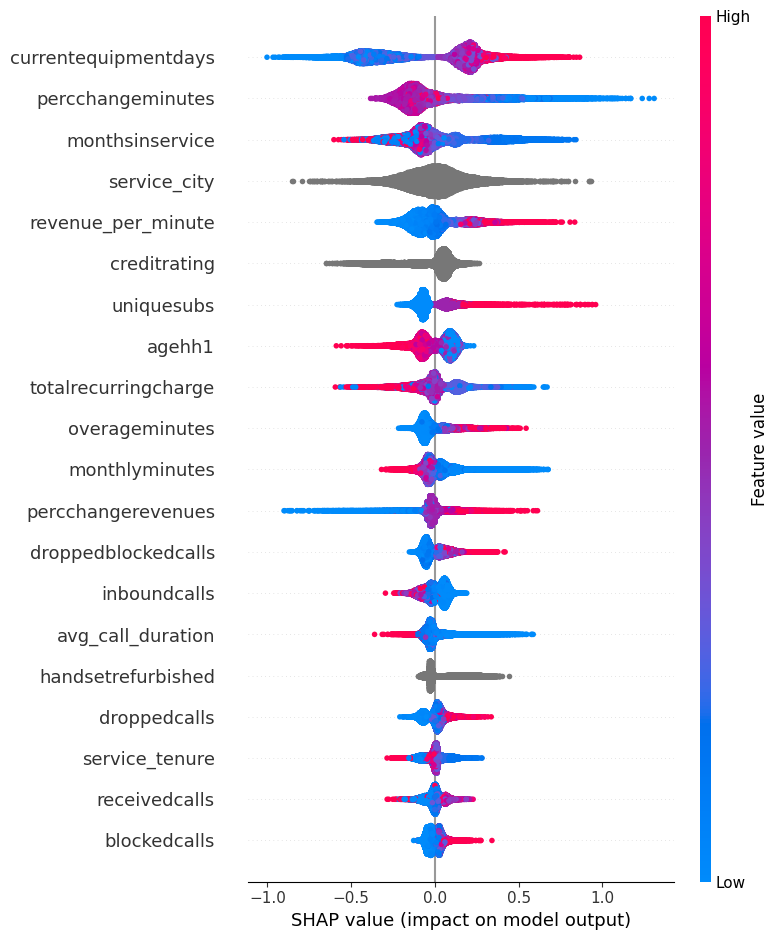

In [13]:
shap_values = explainer.shap_values(dtrain)

# Generate the SHAP summary plot
shap.summary_plot(shap_values, X_train[model.feature_names],)

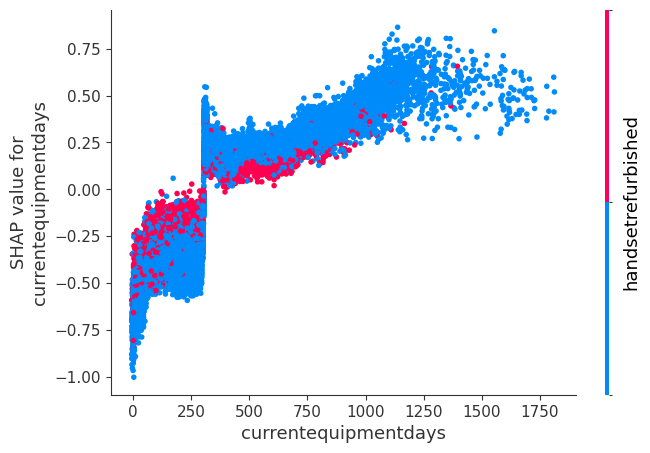

In [14]:
shap.dependence_plot('currentequipmentdays', shap_values, X_train[model.feature_names])

In [16]:
pd.DataFrame(shap_values, columns=model.feature_names).to_csv('sample_data.csv', index=False)

In [19]:
with open(conf['model']['shapexplainer_model_location'], 'wb') as f:
    pickle.dump(explainer, f)

In [20]:
X_train.to_csv('train_sample_data.csv', index=False)